# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [44]:
!pip install pmdarima

In [45]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('./HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


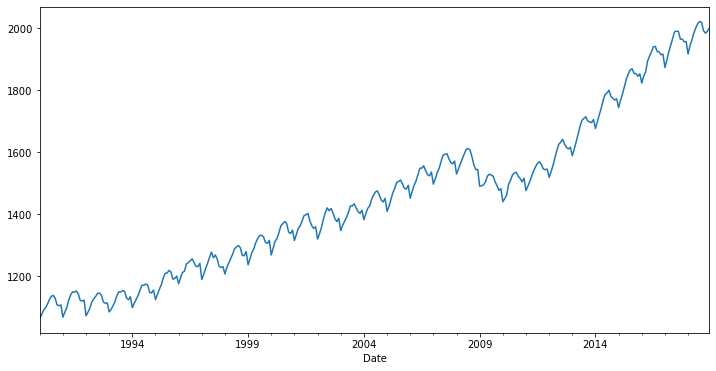

In [11]:
## Постройте график атрибута 'Employees'

ax = df['Employees'].plot(figsize = (12,6))

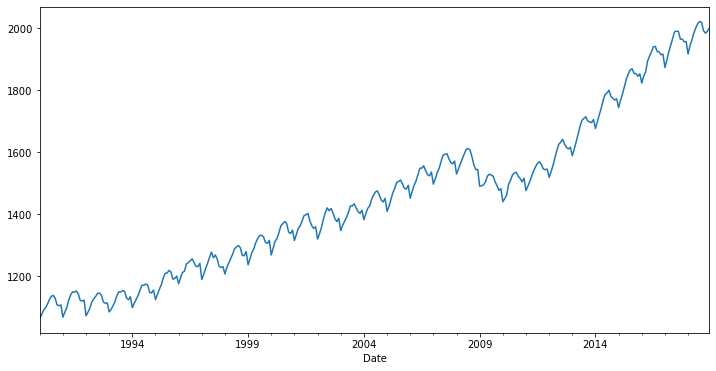

In [10]:
ax = df['Employees'].plot(figsize = (12,6))

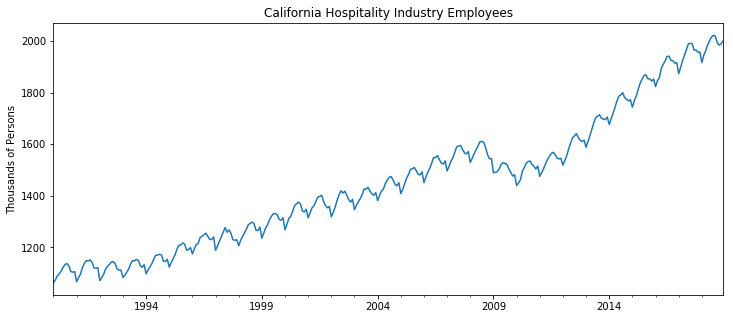

In [2]:
# добавьте заголовок и подписи

[Text(0, 0.5, 'Thousands of Persons')]

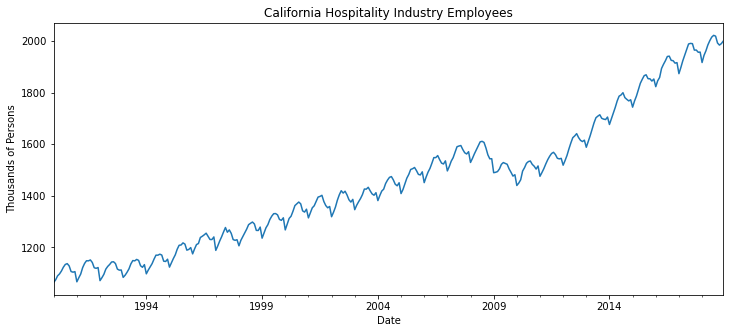

In [27]:
ax = df['Employees'].plot(figsize = (12,5), title = 'California Hospitality Industry Employees')
ax.set(ylabel = 'Thousands of Persons')

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

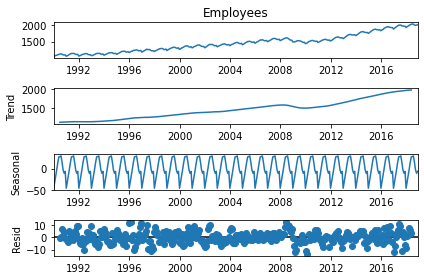

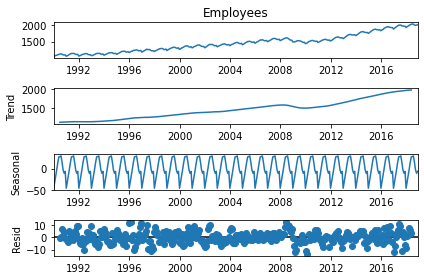

In [36]:
res = seasonal_decompose(df['Employees'])
res.plot()

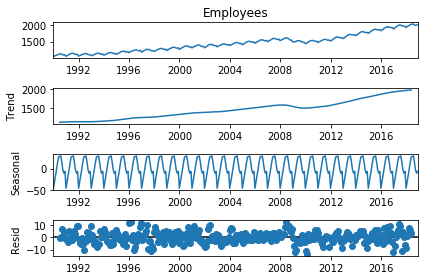

In [11]:
# отобразите результат


### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
# Подсказка: используйте auto_arima

In [47]:
auto_arima(df['Employees'], seasonal = True, m=12).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 18 Mar 2022   AIC                           2208.504
Time:                                      19:00:51   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [51]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [55]:
model = SARIMAX(train['Employees'], order=(0,1,0), seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Fri, 18 Mar 2022   AIC                           2196.814
Time:                                    19:11:37   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [61]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


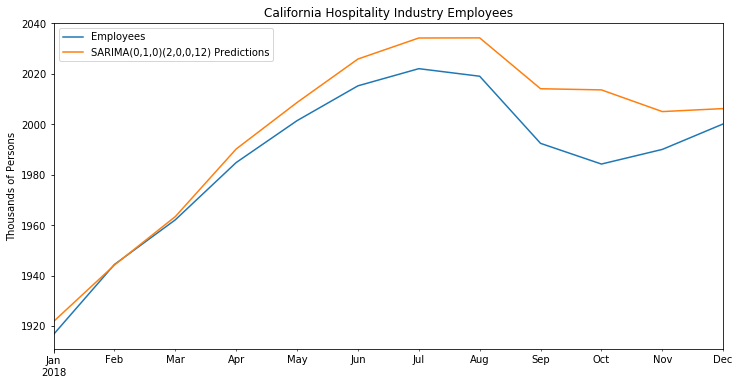

In [8]:
# ваш код

[Text(0, 0.5, 'Thousands of Persons')]

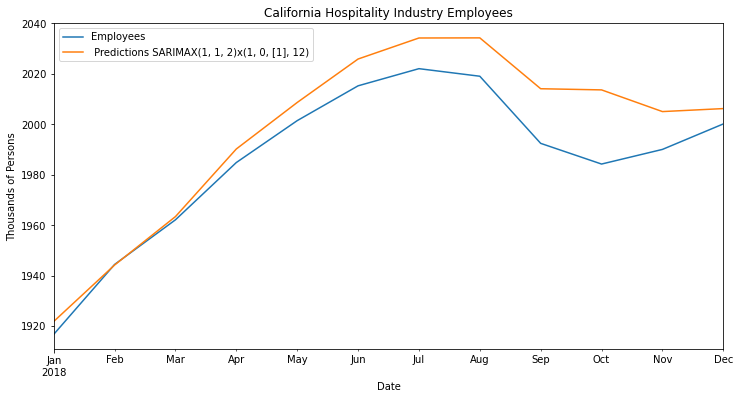

In [65]:
ax = test['Employees'].plot(figsize = (12,6), legend = True, title = 'California Hospitality Industry Employees' )
predictions.plot(legend = True)
ax.set(ylabel = 'Thousands of Persons')

### 8. Оцените качество модели с помощью MSE и RMSE


In [72]:
# Подсказка: используйте функции mean_squared_error и rmse 
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

error = mean_squared_error(test['Employees'], predictions)
error1 = rmse(test['Employees'],predictions)
print(f'SARIMAX(0,1,0)x(2,0,0,12) MSE Error: {error:11.10}')
print(f'SARIMAX(0,1,0)x(2,0,0,12) RMSE Error: {error1:11.10}')

SARIMAX(0,1,0)x(2,0,0,12) MSE Error: 182.8506635
SARIMAX(0,1,0)x(2,0,0,12) RMSE Error:  13.5222285


In [9]:
# ваш код

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [86]:
model = SARIMAX(df['Employees'],order=(0,1,0), seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

fcast = results.predict(len(df), len(df)+11).rename('forecast')

In [44]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = [ваш код] 

### 10. Постройте график предсказаний и график исходных данных


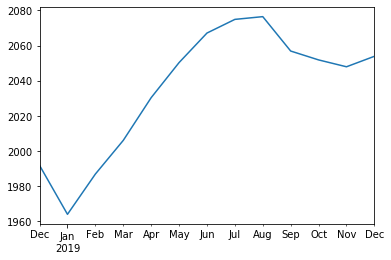

In [ ]:
fcast.plot()

<AxesSubplot:>

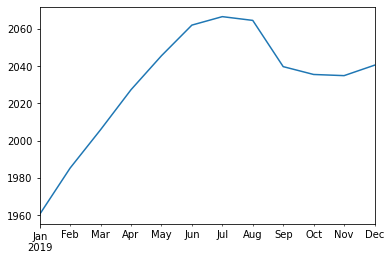

In [87]:
fcast.plot()

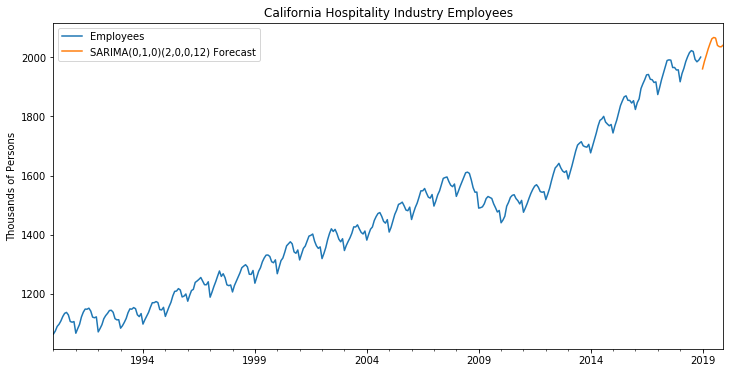

In [11]:
# отобразите общий график

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

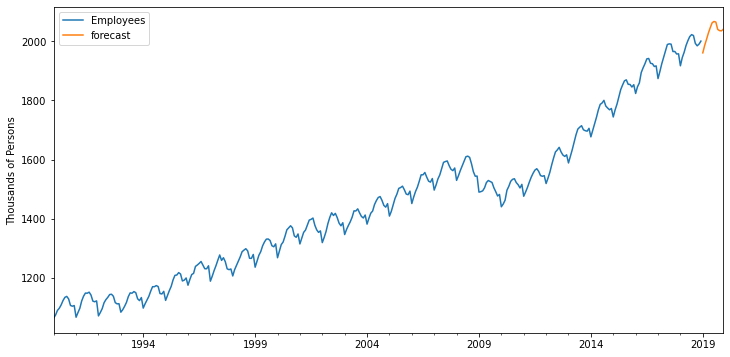

In [94]:
ax = df['Employees'].plot(figsize = (12,6), legend = True)
fcast.plot( legend = True)
ax.set(xlabel = None, ylabel = 'Thousands of Persons')